             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

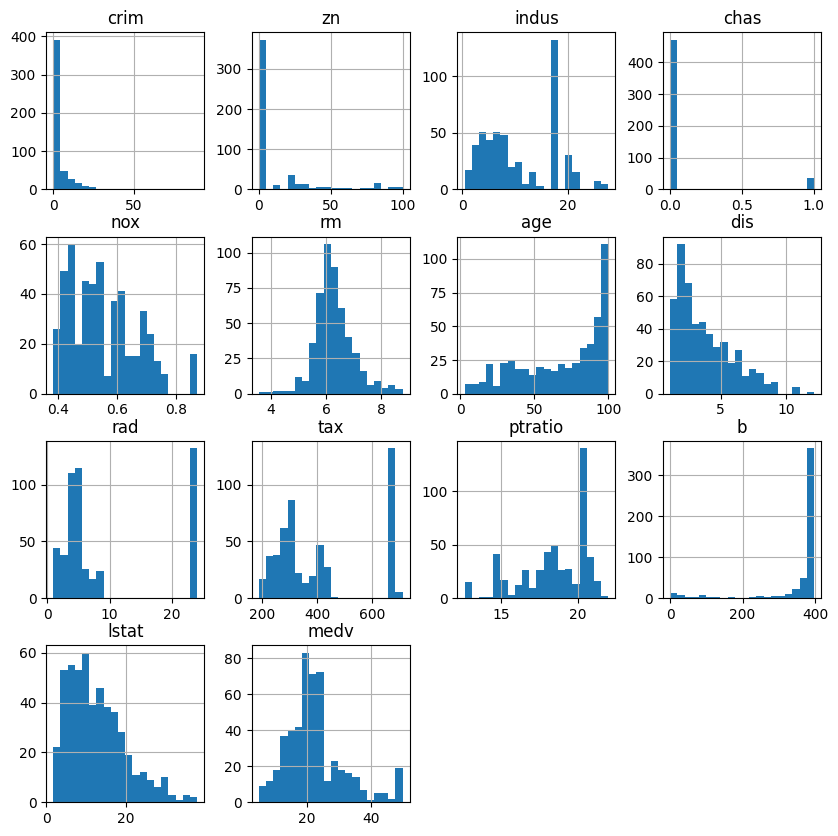

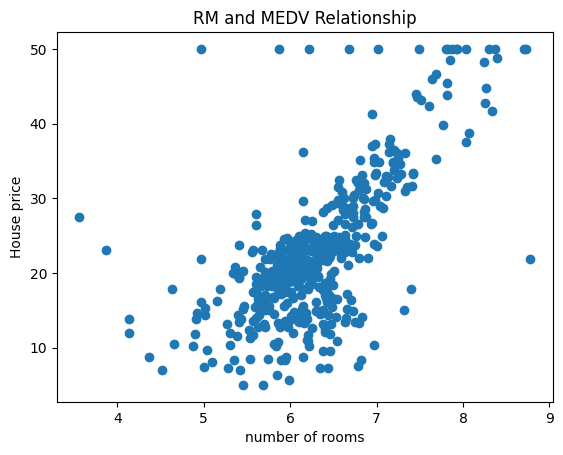

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
print(df.describe())

print(df.head())

print(df.info())

df.hist(figsize=(10,10),bins=20)
plt.show()

plt.scatter(df['rm'],df['medv'])
plt.title('RM and MEDV Relationship')
plt.xlabel('number of rooms')
plt.ylabel('House price')
plt.show()



In [24]:
from sklearn.preprocessing import MinMaxScaler
print(df.isnull().sum())

# scale = MinMaxScaler()
# normilize = ["crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat","medv"]
# df[normilize] = scale.fit_transform(df[normilize])
# print(df.head(30))

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


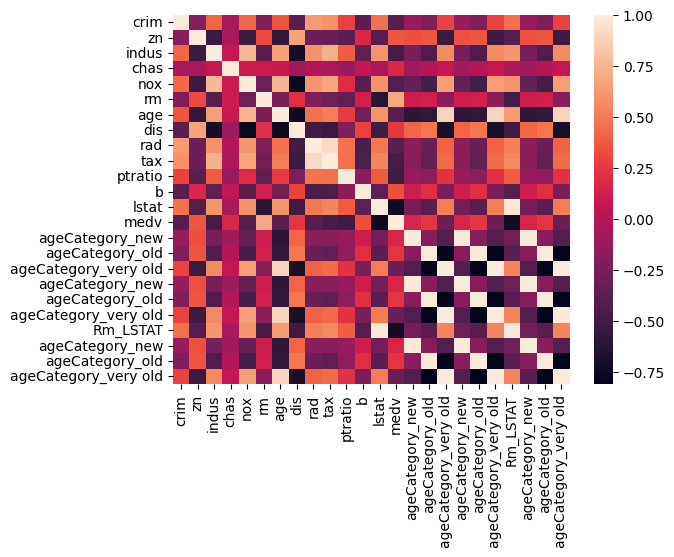

In [37]:
age = ['new','old','very old']
age_bins = [5,23,60,np.inf]
df['ageCategory'] = pd.cut(df['age'],labels=age,bins= age_bins)

df = pd.get_dummies(df, columns=['ageCategory'])

correlation = df.corr()
sns.heatmap(correlation)
plt.show()


In [35]:
df['Rm_LSTAT'] = df['rm'] * df['lstat']
print(df.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ...  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296  ...   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242  ...   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242  ...   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222  ...   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222  ...   

        b  lstat  medv  ageCategory_new  ageCategory_old  \
0  396.90   4.98  24.0            False            False   
1  396.90   9.14  21.6            False            False   
2  392.83   4.03  34.7            False            False   
3  394.63   2.94  33.4            False             True   
4  396.90   5.33  36.2            False             True   

   ageCategory_very old  ageCategory_new  ageCategory_old  \
0                  True            False            False   
1                  True            False            False   

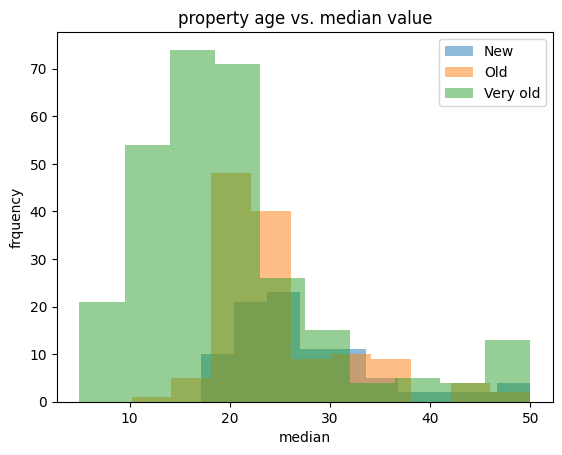

In [42]:
new_properties = df[df['age'] <= 35]
old_properties = df[(df['age'] > 35) & (df['age'] <= 70)]
very_old_properties = df[df['age'] > 70]

plt.hist(new_properties['medv'],label='New',alpha= 0.5)
plt.hist(old_properties['medv'],label='Old',alpha= 0.5)
plt.hist(very_old_properties['medv'],label='Very old',alpha = 0.5)
plt.title('property age vs. median value')
plt.xlabel('median')
plt.ylabel('frquency')
plt.legend()
plt.show()

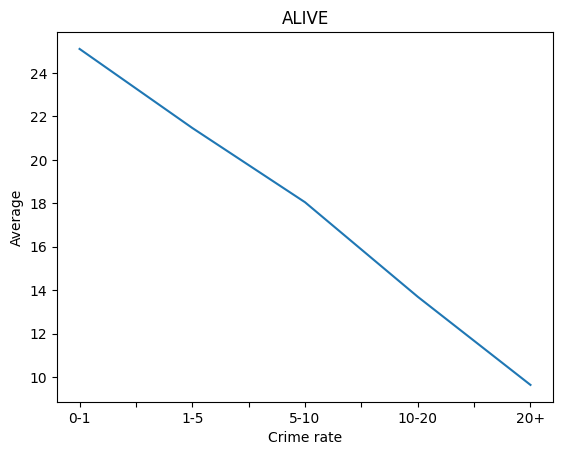

In [45]:
df['CRIM_BIN'] = pd.cut(df['crim'], bins=[0, 1, 5, 10, 20, max(df['crim'])], labels=['0-1', '1-5', '5-10', '10-20', '20+'])
grouby_crime = df.groupby('CRIM_BIN')['medv'].mean()

grouby_crime.plot(kind='line')
plt.xlabel('Crime rate')
plt.ylabel('Average')
plt.title('ALIVE')
plt.show()